In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [17]:
# Reading the file and printing the first 5
df = pd.read_csv("../data/cleaned_car_price_dataset.csv")

Getting avg of Prices by Year

In [18]:
average_prices = df.groupby('Prod. year')['Price'].mean().reset_index()
average_prices[:10]

,Prod. year,Price
0,1939,171.333333
1,1943,119172.000000
2,1947,150.000000
3,1953,17735.250000
4,1957,7527.000000
5,1964,6585.500000
6,1965,65074.000000
7,1968,2200.000000
8,1973,15681.000000
9,1974,2437.000000


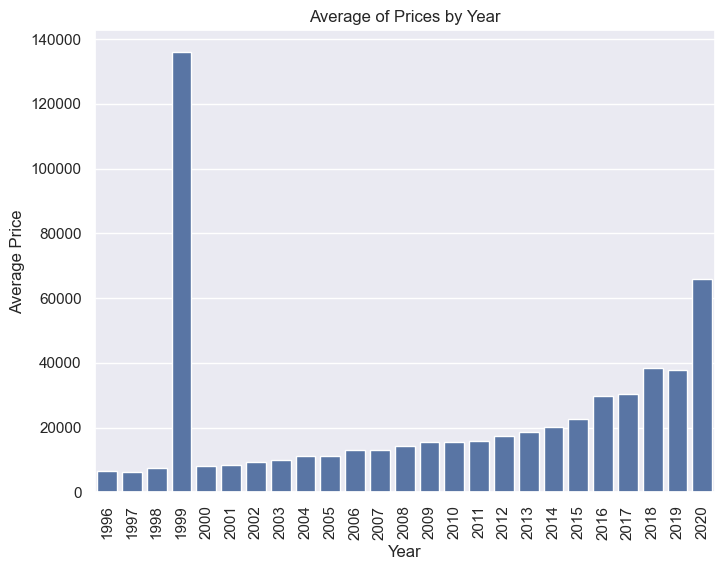

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Prod. year', y='Price', data=average_prices.tail(25))
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.show()

Smallest and Largest prices with their Years

In [20]:
# Find the year associated with the smallest and largest values in the 'Price' col
min_year = average_prices.loc[average_prices['Price'].idxmin(), 'Prod. year']
max_year = average_prices.loc[average_prices['Price'].idxmax(), 'Prod. year']

min_price = average_prices['Price'].min()
max_price = average_prices['Price'].max()

print(f"Smallest Price: {min_price} in : {min_year}")
print(f"Largest Price: {max_price} in : {max_year}")

Smallest Price: 150.0 in : 1947
Largest Price: 135935.48780487804 in : 1999


In [21]:
# Separete values , count of each values to plot them
category_counts = df['Category'].value_counts().reset_index()

category_counts.columns = ['Category', 'Count']

print(category_counts)

       Category  Count
0         Sedan   7010
1          Jeep   4225
2     Hatchback   2548
3       Minivan    534
4         Coupe    476
5     Universal    311
6      Microbus    295
7   Goods wagon    229
8        Pickup     51
9     Cabriolet     35
10    Limousine     11


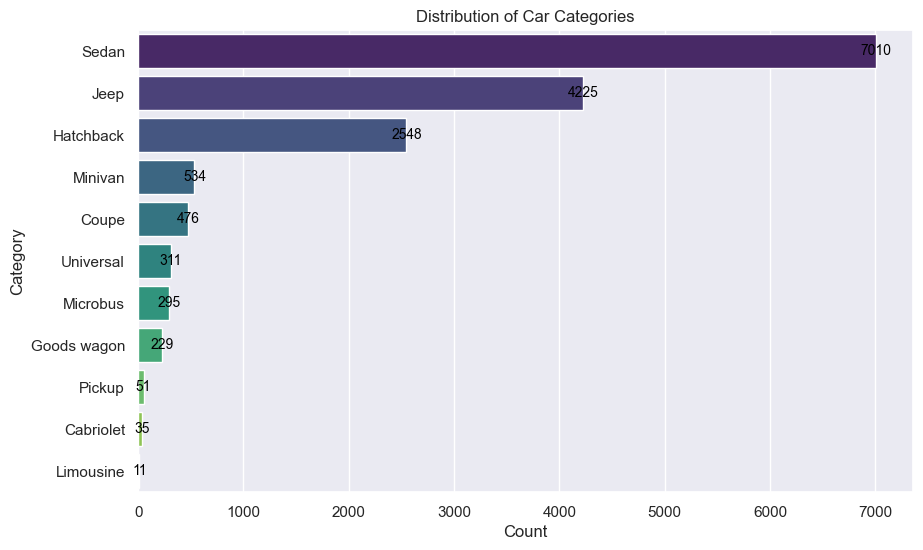

In [22]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='Category', data=category_counts, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Car Categories')

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')

plt.show()

Checking for Corrletion Between Doors and Price

In [23]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1078.5,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,879.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4,Automatic,4x4,04-May,Left wheel,White,0
4,11726,546.5,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4,Automatic,Front,04-May,Left wheel,Silver,4


In [24]:
df['Doors'].value_counts()

Doors
04-May    14855
02-Mar      746
>5          124
Name: count, dtype: int64

In [25]:
# Mapping categorical values to numerical values
door_mapping = {'02-Mar': 2, '04-May': 4, '>5': 5}
df['Doors'] = df['Doors'].map({'02-Mar': 2, '04-May': 4, '>5': 5})

# Calculate correlation coefficient
corr = df['Doors'].corr(df['Price'])
print("Correlation between Doors and Prices is: {:.3f}".format(corr))

Correlation between Doors and Prices is: -0.033


"-0.033" refers to a weak negative correlation between the number of doors and prices.

Relation between "Engine volume" and "Cylinders"

In [ ]:
# Calculate correlation coefficient
corr = df['Engine volume'].corr(df['Cylinders'])
print("Correlation between Engine volume and Cylinders is: {:.3f}".format(corr))

Correlation between Engine volume and Cylinders is: 0.631


it suggests the precence of strong coorelation

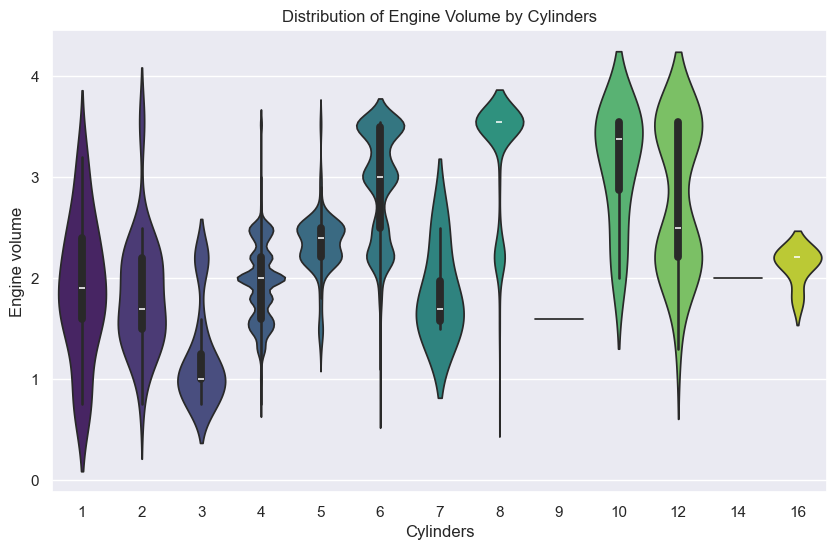

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Cylinders'], y=df['Engine volume'], palette='viridis')
plt.title('Distribution of Engine Volume by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Engine volume')
plt.show()

Distribution of Gearbox Types

In [29]:
gearbox_count=df['Gear box type'].value_counts()
gearbox_count

Gear box type
Automatic    10088
Tiptronic     3064
Manual        1841
Variator       732
Name: count, dtype: int64

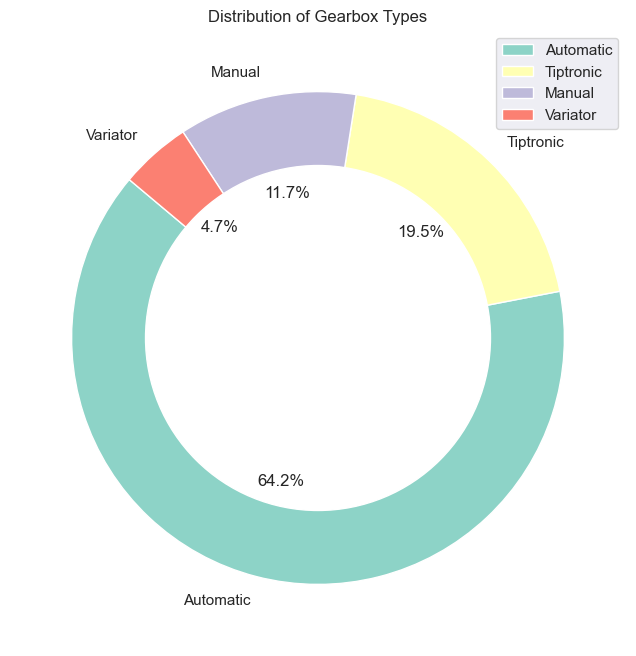

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(gearbox_count, labels=gearbox_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend()
plt.title('Distribution of Gearbox Types')
plt.show()

Distribution of Gearbox Types

In [31]:
df['Wheel'].value_counts()

Wheel
Left wheel          14293
Right-hand drive     1432
Name: count, dtype: int64

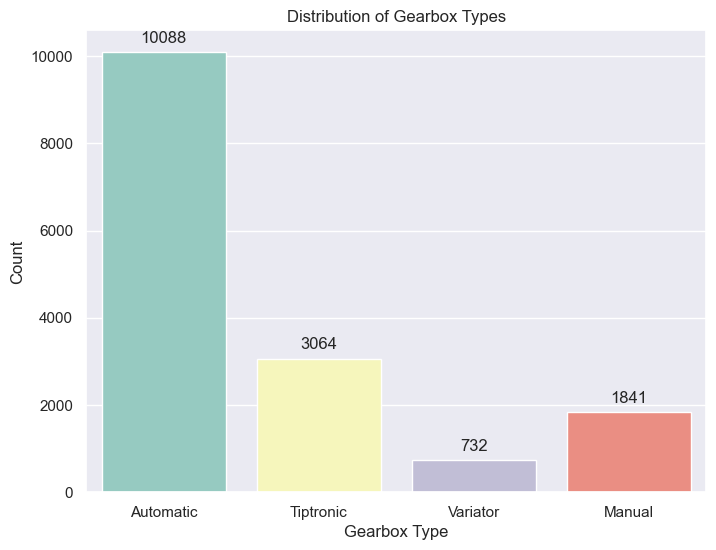

In [32]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gear box type', data=df, palette='Set3')

# Adding count labels above each bar as integers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Gearbox Type')
plt.ylabel('Count')
plt.title('Distribution of Gearbox Types')

plt.show()

Distribution of Leather Interior

In [33]:
leather_counts=df['Leather interior'].value_counts()
leather_counts

Leather interior
Yes    10558
No      5167
Name: count, dtype: int64

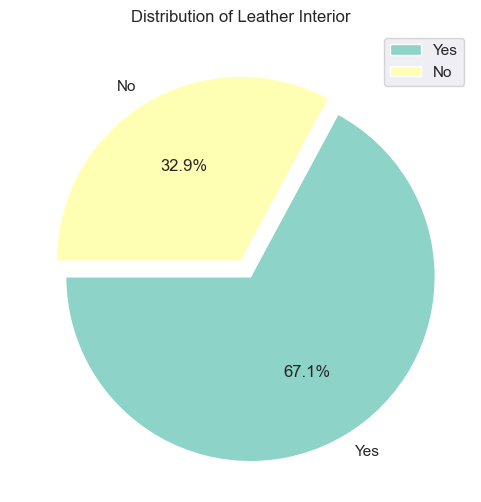

In [35]:
plt.figure(figsize=(6, 6))
explode = (0.1, 0) 
plt.pie(leather_counts, labels=leather_counts.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Set3.colors, explode=explode)

plt.legend()
plt.title('Distribution of Leather Interior')

plt.show()

Distribution of Vehicles by Fuel Type and Category

In [36]:
df['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [37]:
df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

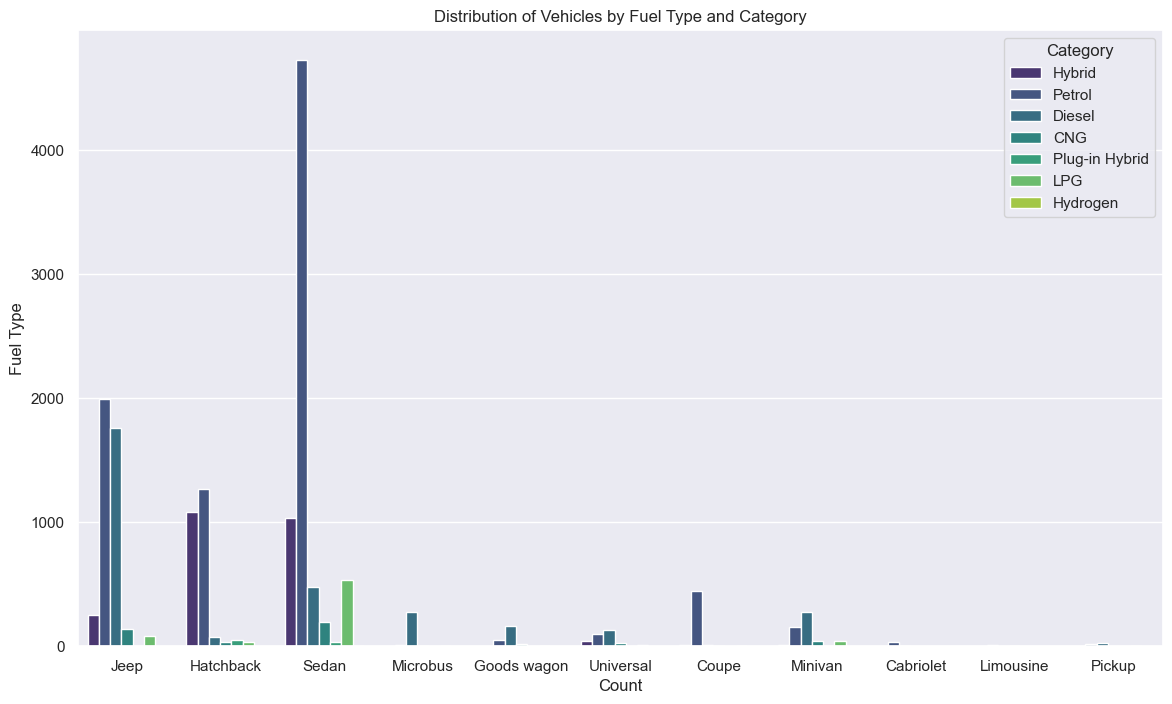

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Category', hue='Fuel type', data=df, palette='viridis')
plt.ylabel('Fuel Type')
plt.xlabel('Count')
plt.title('Distribution of Vehicles by Fuel Type and Category')
plt.legend(title='Category')

plt.show()

Prices for Top 5 Manufacturer

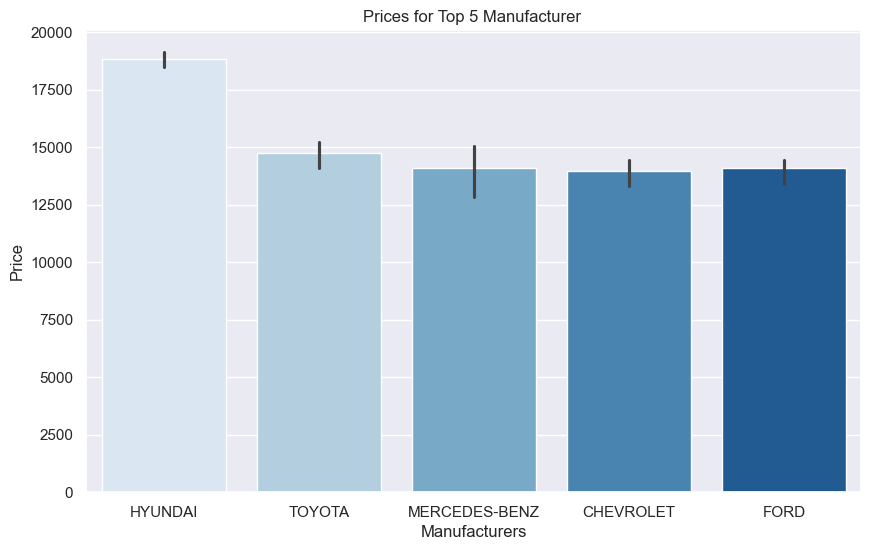

In [39]:
# Selecting 5 top manufacturers
top_manufacturers = df['Manufacturer'].value_counts().nlargest(5).index


# Create a bar plot with custom colors and sorted order
plt.figure(figsize=(10, 6))
sns.barplot(x='Manufacturer', y='Price', data=df[df['Manufacturer'].isin(top_manufacturers)],
            estimator='median', order=top_manufacturers, palette="Blues")
plt.title('Prices for Top 5 Manufacturer ') #median price
plt.xlabel('Manufacturers')
plt.ylabel('Price')
plt.show()